Calculating $\pi$ using Monte-Carlo Simulation
-------
Acc. to the problem statement $\textbf{4.24}$ in $\textbf{10th}$ edition of Operating System Concepts by ABRAHAM SILBERSCHATZ, PETER BAER GALVIN, GREG GAGNE

Prerequisites / Import statements
--------
------------

In [2]:
import numpy as np
from numpy import random
import threading
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import time

Non-Multithreaded Version of Monte-Carlo Simulation to calculate $\pi$
--------

Computation time = 28.527623000000002ms
Pi we estimated : 3.132
Actual Pi : 3.141592653589793


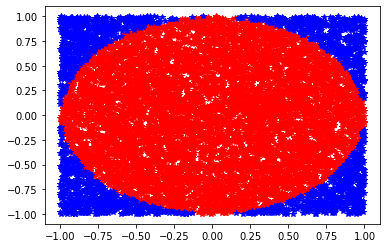

In [5]:
'''
Gets random points within the square (-1,0);(0,-1);(1,0);(0,1)
And also checks if it lies within the circle (that is the circle of max area inscribed in this square) and square or just the square
 '''
n_points = 10000
rectx = []
recty = []
circlex = []
circley = []
tic = time.process_time()
for j in range(n_points) :
  x = random.uniform(-1,1)
  y = random.uniform(-1,1)
  temp = x**2 + y**2
  if(temp<=1) :
    circlex.append(x)
    circley.append(y)
  else :
    rectx.append(x)
    recty.append(y)
  # points_in_circle = circlex.size()
  # points_in_rect = rectx.size()
plt.plot(circlex,circley,'r*')
plt.plot(rectx,recty,'b*')
toc = time.process_time()
print("Computation time = "+str(1000*(toc - tic ))+"ms")
print("Pi we estimated : " + str(4*(len(circlex)/(len(circlex)+len(rectx)))))
print("Actual Pi : " + str(np.pi))


Multithreaded Version of Monte-Carlo Simulation to calculate $\pi$
--------

Computation time of child_thread = 21.69282600000022ms
Pi we estimated : 3.1456
Computation time of parent_thread = 28.33818499999996ms
Actual Pi : 3.141592653589793


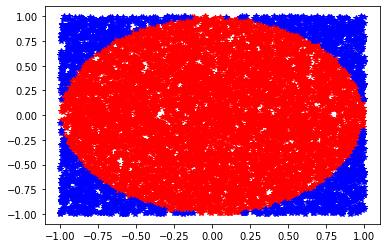

In [6]:
n_points = 10000
rectx = []
recty = []
circlex = []
circley = []
our_pi = 0
'''
Gets random points within the square (-1,0);(0,-1);(1,0);(0,1)
And also checks if it lies within the circle (that is the circle of max area inscribed in this square) and square or just the square
 '''
def get_points(n_points):
  for i in range(n_points) :
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    temp = x**2 + y**2
    if(temp<=1) :
      circlex.append(x)
      circley.append(y)
    else :
      rectx.append(x)
      recty.append(y)
    # points_in_circle = circlex.size()
    # points_in_rect = rectx.size()
  # Plot
  plt.plot(circlex,circley,'r*')
  plt.plot(rectx,recty,'b*')

def get_pi(n_points):
  child_thread = threading.Thread(target=get_points,args=(n_points,))
  child_thread.start()
  tic = time.process_time()
  child_thread.join()
  toc = time.process_time()
  print("Computation time of child_thread = "+str(1000*(toc - tic ))+"ms")
  our_pi = 4*(len(circlex)/n_points)
  print("Pi we estimated : " + str(our_pi))

parent_thread = threading.Thread(target=get_pi,args=(n_points,))
parent_thread.start()
tic = time.process_time()
parent_thread.join()
toc = time.process_time()
print("Computation time of parent_thread = "+str(1000*(toc - tic ))+"ms")
print("Actual Pi : " + str(np.pi))